In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

#to ignore Warnings
import warnings
warnings.filterwarnings('ignore')

print('Libraries Import Successfully')

Libraries Import Successfully


In [2]:
df=pd.read_csv('train.csv')

In [3]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x=df.drop('label', axis=1)
y=df['label']

In [6]:
x.shape

(42000, 784)

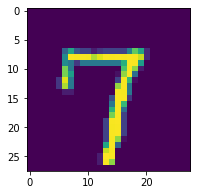

7


In [7]:
plt.figure(figsize=(3,3))
#plotting the 3rd row
index=6
#as the data is 784 dimensions we need to bring it back to 28X28 format
grid_data=x.iloc[index].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='viridis')
plt.show()
print(y[index])

In [8]:
#Spliltting Data into Train test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400,)
(12600,)


In [9]:
#Use StandardScaler to help you standardize the dataset's features onto unit scale (mean = 0 and variance = 1) 
#StandardScaler results in a distribution with a standard deviation equal to 1. 
#The variance is equal to 1 also, because variance = standard deviation squared.

sc=StandardScaler()

sc.fit(x_train)

x_train=sc.fit_transform(x_train)

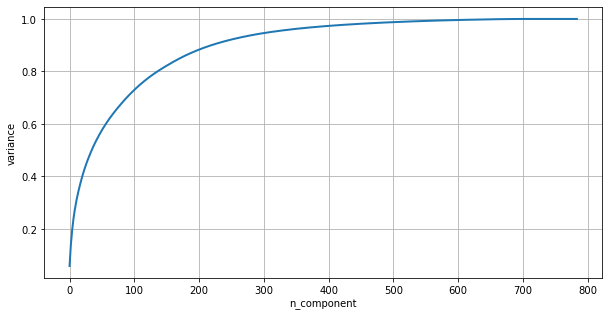

In [10]:
pca=PCA()

pca.n_componants=784

pca_data=pca.fit_transform(x_train)

#Explained variance is calculated as ratio of eigenvalue of a articular principal component (eigenvector) with total eigenvalues

percentage_var_explained= pca.explained_variance_ratio_;
cum_var_explained=np.cumsum(percentage_var_explained)

#plot PCA spectrum
plt.figure(figsize=(10,5))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_component')
plt.ylabel('variance')
plt.show()

In [11]:
pca=PCA()
pca.n_componants=784
pca_data=pca.fit_transform(x_train)
#look at explained variance of PCA componants

exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)
for index,var in enumerate(exp_var_cumsum):
    print('if n_components= %d,  varinace=%f' %(index,np.round(var,3)))

#As it says %s mean string value
#%d mean integer
#%f mean foat

if n_components= 0,  varinace=5.850000
if n_components= 1,  varinace=10.070000
if n_components= 2,  varinace=13.920000
if n_components= 3,  varinace=16.920000
if n_components= 4,  varinace=19.520000
if n_components= 5,  varinace=21.790000
if n_components= 6,  varinace=23.800000
if n_components= 7,  varinace=25.600000
if n_components= 8,  varinace=27.210000
if n_components= 9,  varinace=28.660000
if n_components= 10,  varinace=30.060000
if n_components= 11,  varinace=31.310000
if n_components= 12,  varinace=32.470000
if n_components= 13,  varinace=33.610000
if n_components= 14,  varinace=34.690000
if n_components= 15,  varinace=35.720000
if n_components= 16,  varinace=36.690000
if n_components= 17,  varinace=37.650000
if n_components= 18,  varinace=38.580000
if n_components= 19,  varinace=39.490000
if n_components= 20,  varinace=40.350000
if n_components= 21,  varinace=41.190000
if n_components= 22,  varinace=41.990000
if n_components= 23,  varinace=42.760000
if n_components= 24,  varin

In [12]:
pca=PCA(.90)
pca.fit(x_train)
print('Number of components to explain 90% Variance is', pca.n_components_)

Number of components to explain 90% Variance is 220


# plot in 2D Shape

In [13]:
pca=PCA(n_components=2)
pca_data_vis=pca.fit_transform(x_train)
print('shape of PCA data', pca_data_vis.shape)

shape of PCA data (29400, 2)


In [14]:
import seaborn as sns
pca_data_vis=np.vstack((pca_data_vis.T,y_train)).T
pca_vis_df=pd.DataFrame(data=pca_data_vis,columns=('1st_col','2nd_col','label'))


In [15]:
pca_vis_df.head()

,1st_col,2nd_col,label
0,19.687362,3.578388,0.0
1,-7.759654,-4.314086,1.0
2,-3.900034,4.918506,9.0
3,-6.388519,-2.876251,1.0
4,-1.677163,5.748270,7.0


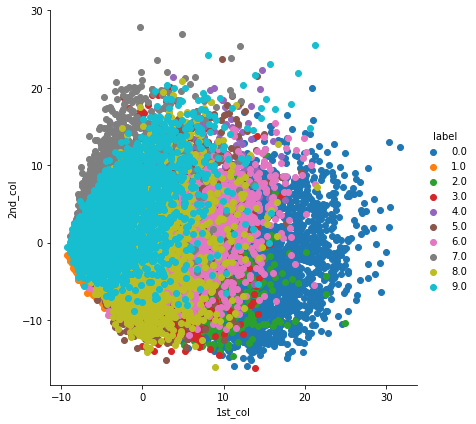

In [16]:
sns.FacetGrid(pca_vis_df,hue='label', size=6).map(plt.scatter,'1st_col','2nd_col').add_legend()

plt.show()

In [17]:
print(x_train.shape)
print(y_train.shape)

(29400, 784)
(29400,)


In [18]:
pca=PCA(0.90)
pca.fit(x_train)
x_train=pca.transform(x_train)
x_test=pca.transform(x_test)

from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(class_weight='balanced')
LogReg.fit(x_train,y_train)
y_pred=LogReg.predict(x_test)

In [19]:
print(x_train.shape)
print(y_train.shape)

(29400, 220)
(29400,)


In [20]:
from sklearn.metrics import  confusion_matrix, classification_report, recall_score, precision_score, accuracy_score, f1_score

print('f1_score \n', f1_score(y_test,y_pred, average='weighted'))
print('accuracy_score \n',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred, average='weighted'))
print('recall_score',recall_score(y_test,y_pred, average='weighted'))
print('classification_report \n',classification_report(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))

f1_score 
 0.8245592946244182
accuracy_score 
 0.8303174603174603
precision_score 0.8808361812079577
recall_score 0.8303174603174603
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      1242
           1       0.98      0.87      0.92      1429
           2       0.97      0.75      0.85      1276
           3       0.89      0.87      0.88      1298
           4       0.89      0.91      0.90      1236
           5       0.97      0.23      0.37      1119
           6       0.91      0.93      0.92      1243
           7       0.97      0.84      0.90      1334
           8       0.48      0.97      0.64      1204
           9       0.82      0.89      0.85      1219

    accuracy                           0.83     12600
   macro avg       0.88      0.82      0.82     12600
weighted avg       0.88      0.83      0.82     12600

confusion_matrix 
 [[1204    0    1    2    6    0   10    1   14    4]
 [   0 1245 

# T- Distribution Stochastic Neighbourhood Embedding

In [21]:
from sklearn.manifold import TSNE
t_sne=TSNE(n_components=2, random_state=0)
tsne_data= t_sne.fit_transform(x_train)

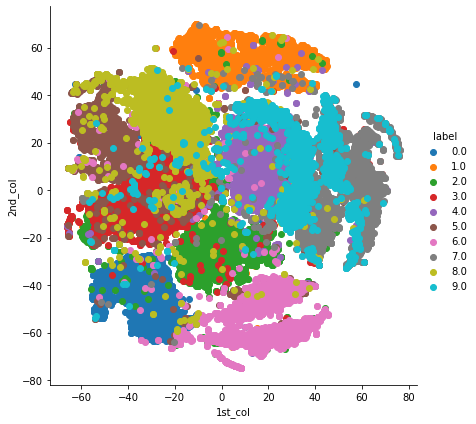

In [22]:
#Visualisation
import seaborn as sns
tsne_data_=np.vstack((tsne_data.T,y_train)).T
tsne_vis_df=pd.DataFrame(data=tsne_data_,columns=('1st_col','2nd_col','label'))
sns.FacetGrid(tsne_vis_df,hue='label', size=6).map(plt.scatter,'1st_col','2nd_col').add_legend()

plt.show()